<a href="https://colab.research.google.com/github/Willlee0225/nbviewer/blob/master/%E6%89%93%E9%80%A0%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

%tensorflow_version 2.x

In [0]:
import tensorflow as tf

1. 讀入 Fashion MNSIT 數據集

In [0]:
from tensorflow.keras.datasets import fashion_mnist


In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


2. 欣賞數據集內容


In [0]:
len(x_train)

60000

In [0]:
len(x_test)

10000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
n=2000
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         53,  70,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  83, 223, 220,
        231, 233, 231, 218, 191,  33,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 142, 248, 228, 215,
        217, 219, 219, 220, 235, 234, 107,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   3,   0,  69, 245, 221, 229, 213,
        219, 206, 210, 217, 222, 218, 243,  64,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 231, 224, 230, 222,
        217, 222, 224, 215, 215, 222, 219,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 193, 238, 216, 222, 218, 213,
        211, 208, 210, 217, 224, 217, 222, 169,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
y_train[n]

4

這是 Coat


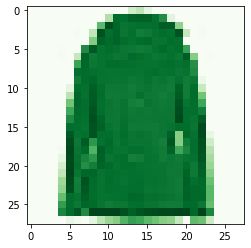

In [0]:
n = 2000
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greens');

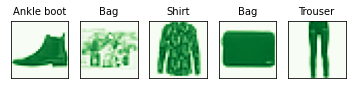

In [0]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greens')

3. 資料整理

In [0]:
x_train = x_train/235
x_test = x_test/235

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [0]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train[9487]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

打造神經網路

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
model = Sequential()
model.add(Dense(200, input_dim=784, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

組裝我們的神經網路¶

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 218,310
Trainable params: 218,310
Non-trainable params: 0
_________________________________________________________________


訓練

In [0]:
model.fit(x_train, y_train, batch_size=25, epochs=40)

Epoch 1/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0430 - accuracy: 0.6946
Epoch 2/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0260 - accuracy: 0.8244
Epoch 3/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0234 - accuracy: 0.8414
Epoch 4/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0219 - accuracy: 0.8522
Epoch 5/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0208 - accuracy: 0.8596
Epoch 6/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0200 - accuracy: 0.8655
Epoch 7/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0193 - accuracy: 0.8699
Epoch 8/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0187 - accuracy: 0.8740
Epoch 9/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0183 - accuracy: 0.8767
Epoch 10/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.017

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
神經網路預測是: Sandal


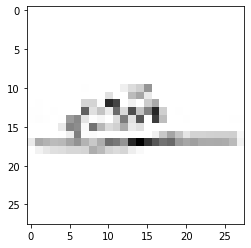

In [0]:
result = model.predict_classes(x_test)
n = 2000
print('神經網路預測是:', class_names[result[n]])

plt.imshow(x_test[n].reshape(28,28), cmap='Greys')